In [1]:
from image_classification_simulation.models.autoencoder_baseline import ConvAutoEncoder
from image_classification_simulation.data.office31_loader import Office31Loader
from image_classification_simulation.data.mnist_loader import MNISTLoader
import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Loading Office31 data

hparams = {
    "loss": "MSELoss",
    "optimizer": "adam",
    "num_channels": 3,
    "num_filters": 16,
    "batch_size": 16,
}

test_loader = Office31Loader("/home/mila/a/aldo.zaimi/data/domain_adaptation_images/amazon/images", hyper_params=hparams)
test_loader.setup(stage="fit")

Number of workers set to: 1
image size set to: 224


In [9]:
#Training the AE from the main function
! main --data /home/mila/a/aldo.zaimi/data/domain_adaptation_images/amazon/images --output ./output --config ../examples/conv_ae/config.yaml --start-from-scratch

/home/mila/a/aldo.zaimi/.conda/envs/simulation_venv/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
INFO:image_classification_simulation.main:INFO: 'ae_test_exp' does not exist. Creating a new experiment
INFO:image_classification_simulation.main:List of hyper-parameters:
INFO:image_classification_simulation.utils.hp_utils:	hp "architecture" => "conv_ae"
INFO:image_classification_simulation.utils.hp_utils:	hp "batch_size" => "16"
INFO:image_classification_simulation.utils.hp_utils:	hp "exp_name" => "ae_test_exp"
INFO:image_classification_simulation.utils.hp_utils:	hp "max_epoch" => "10"
INFO:image_classification_simulation.utils.hp_utils:	hp "optimizer" => "adam"
INFO:image_classification_simulation.utils.hp_utils:	hp "patience" => "20"
INFO:image_classification_simulation.utils.hp_utils:	hp "seed" => "1234"
INFO:image_classification_simulation.utils.hp_utils:

INFO:image_cl

torch.Size([3, 224, 224])


Text(0.5, 1.0, 'Reconstructed image')

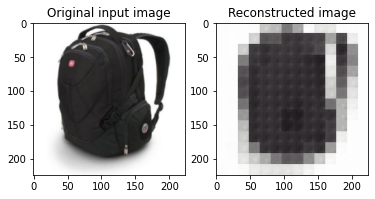

In [19]:
# To visualize input image vs reconstructed output from the AE

i = iter(test_loader.test_set.dataset)
img, label = next(i)

model = ConvAutoEncoder(hparams)
checkpoint = torch.load("./output/last_model/model.ckpt")
model.load_state_dict(checkpoint['state_dict'])
model.eval()

output = model(img)
print(output.shape)
output = output.detach().numpy()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.transpose(img, (1, 2, 0)))
ax1.set_title("Original input image")
ax2.imshow(np.transpose(output, (1, 2, 0)))
ax2.set_title("Reconstructed image")
